In [1]:
pip install numpy<2


Note: you may need to restart the kernel to use updated packages.


The system cannot find the file specified.


how the students;s performance(test score) is affect by other variable such as gender, ethnicity, parential level of education, lunch and test preparation course.

data set has 8 col and 1000 rows
data source-  https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

## import data and require packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the CSV Data as Pandas DataFrame/
df = pd.read_csv('StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

Dataset information

## Check Missing values

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

there are no missing values

## Check Duplicates

In [7]:
df.duplicated().sum()

0

there are no duplicates

## Check data types

In [8]:
df.info()
# null and dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##  unique values of each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

## statistics

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


-------insight----------
mean is around betwwen 66 to 68.05
all standard deviation between 14.6 to 15.19
min score in maths -0, reading- 17, writing - 10

In [12]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())



Categories in 'gender' variable:      ['female' 'male']


In [13]:
print("Categories in 'race/ethnicity' variable:     ",end=" " )
print(df['race/ethnicity'].unique())

Categories in 'race/ethnicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']


In [14]:
print("Categories in 'parental level of education' variable:     ",end=" " )
print(df['parental level of education'].unique())

Categories in 'parental level of education' variable:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [15]:
print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

Categories in 'lunch' variable:      ['standard' 'free/reduced']


In [16]:
print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'test preparation course' variable:      ['none' 'completed']


## define numerical & categorical columns

In [17]:
numarical_feature =[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype == 'O']

In [18]:
print("{} numaricals values are: {}".format(len(numarical_feature), numarical_feature))
print("{} catogorical values are: {}.".format(len(categorical_feature),categorical_feature))

3 numaricals values are: ['math score', 'reading score', 'writing score']
5 catogorical values are: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'].


## total score and  average column adding

In [19]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [20]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['avgrage_score'] = df['total_score'] /3
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avgrage_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [21]:
reading_full_marks = df[df['reading score'] == 100]['avgrage_score'].count()
writing_full_marks = df[df['writing score'] == 100]['avgrage_score'].count()
math_full_marks = df[df['math score'] == 100]['avgrage_score'].count()

print('number of students got full marks in reading are: {}'.format(reading_full_marks))
print('number of students got full marks in eriting are: {}'.format(writing_full_marks))
print('number of students got full marks in maths are: {}'.format(math_full_marks))

number of students got full marks in reading are: 17
number of students got full marks in eriting are: 14
number of students got full marks in maths are: 7


In [22]:
reading_less_than20 =df[df['reading score']  <=20]['avgrage_score'].count()
writing_less_than20 =df[df['writing score']  <=20]['avgrage_score'].count()
math_less_than20 =df[df['math score']  <=20]['avgrage_score'].count()

print('number of students got less or equal to 20 are: {}'.format(reading_less_than20 ))
print('number of students got less or equal to 20 are: {}'.format(writing_less_than20))
print('number of students got less or equal to 20 are: {}'.format(math_less_than20))

number of students got less or equal to 20 are: 1
number of students got less or equal to 20 are: 3
number of students got less or equal to 20 are: 4


from above , students have perform bad in maths
and good in reading camparitively

## Exploring Data ( Visualization )

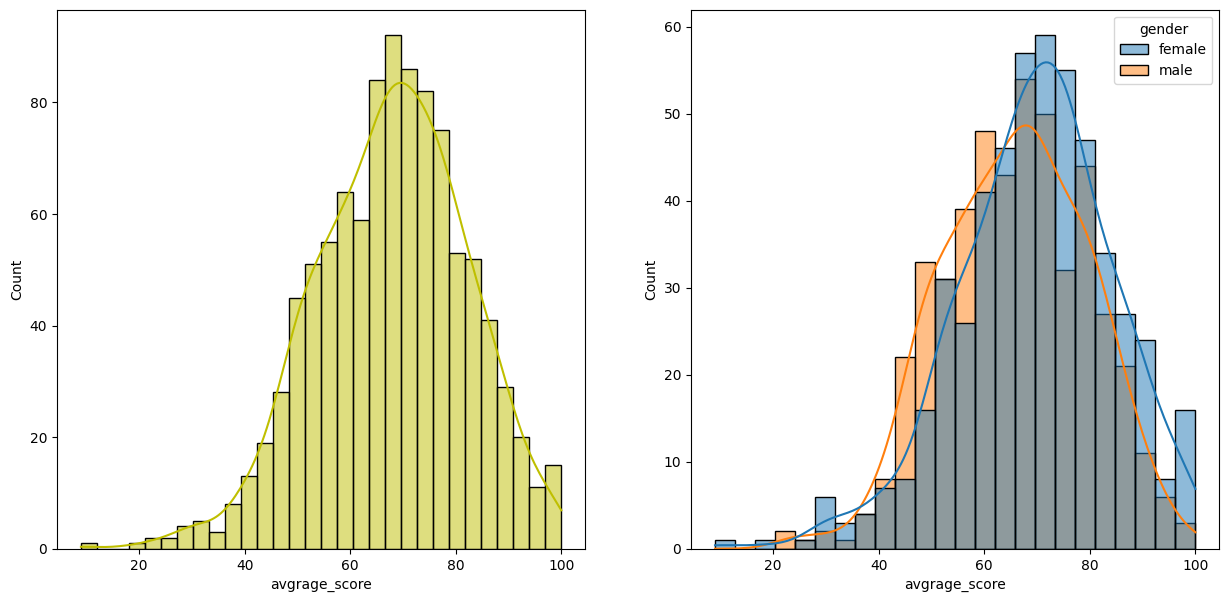

In [23]:
# hist and kde
fig,axs = plt.subplots(1,2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='avgrage_score', bins=30,kde=True, color='y')
plt.subplot(122)
sns.histplot(data=df, x='avgrage_score',kde=True, hue='gender')
plt.show()

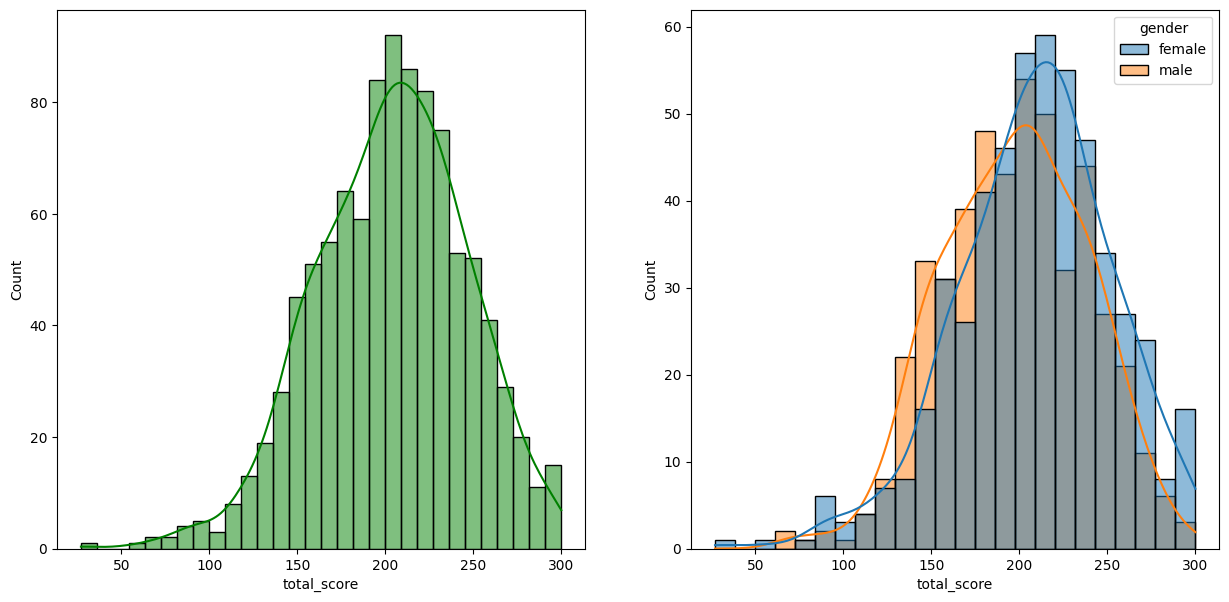

In [24]:
fig, axs = plt.subplots(1, 1, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

female student perform well than male students

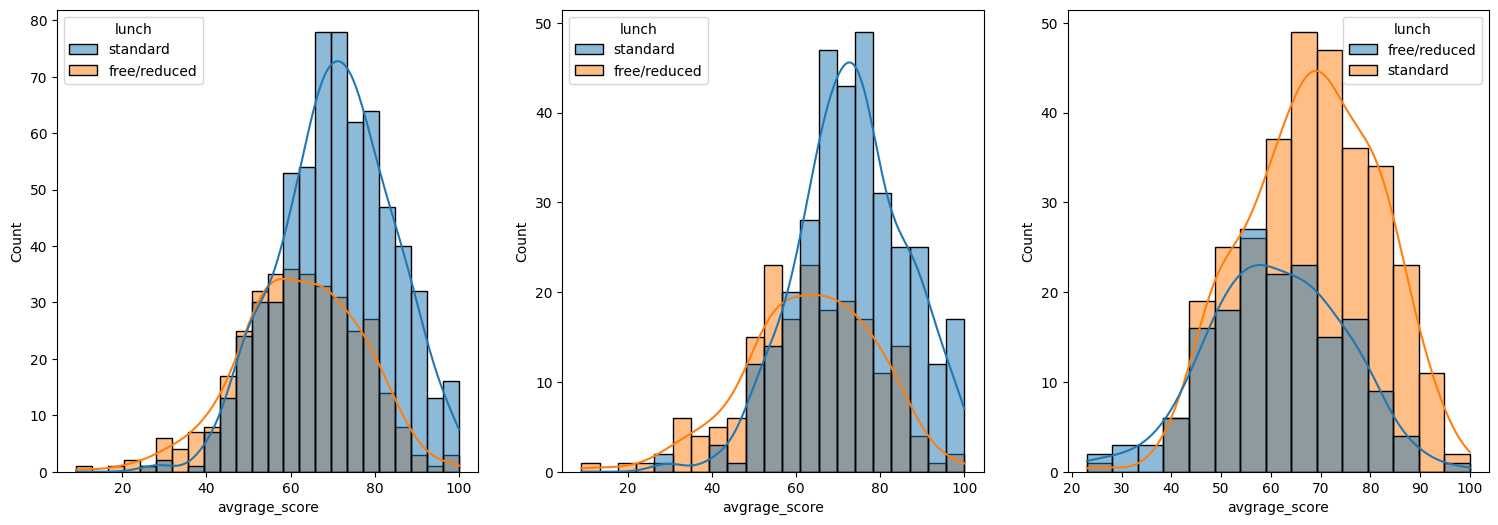

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='avgrage_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='avgrage_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='avgrage_score',kde=True,hue='lunch')
plt.show()

standard lunch helps students to perform well camparitively.
both female and male students perform well in standard lunch camparitively.

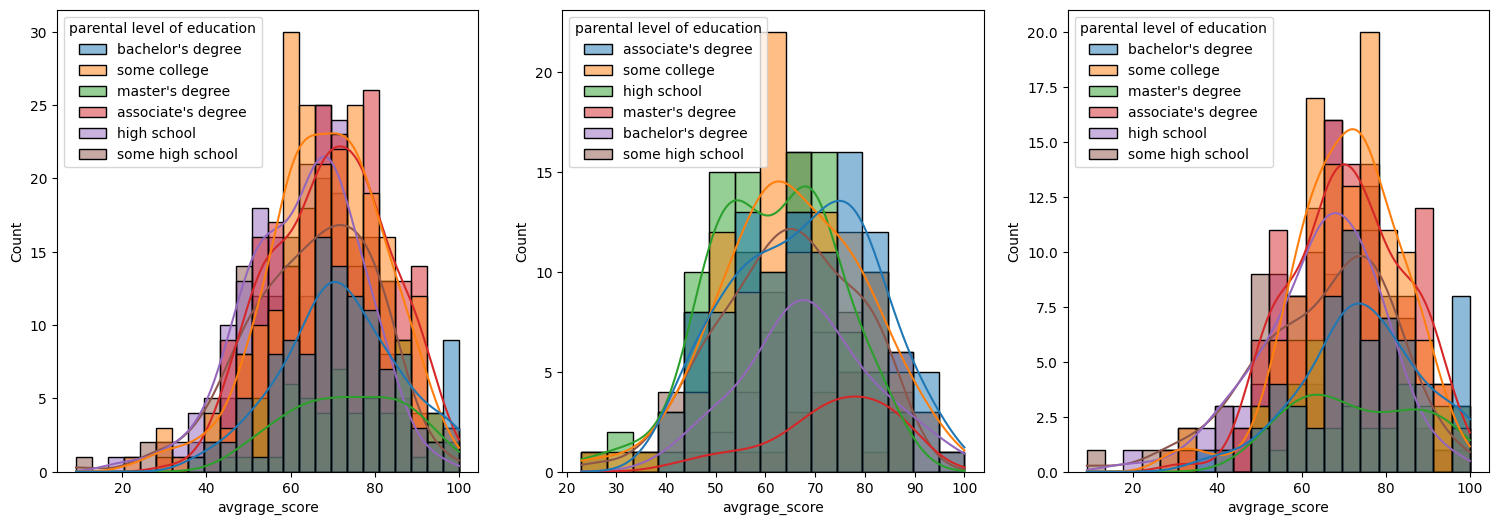

In [26]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='avgrage_score',kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='avgrage_score',kde=True,hue='parental level of education')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='female'],x='avgrage_score',kde=True,hue='parental level of education')
plt.show()

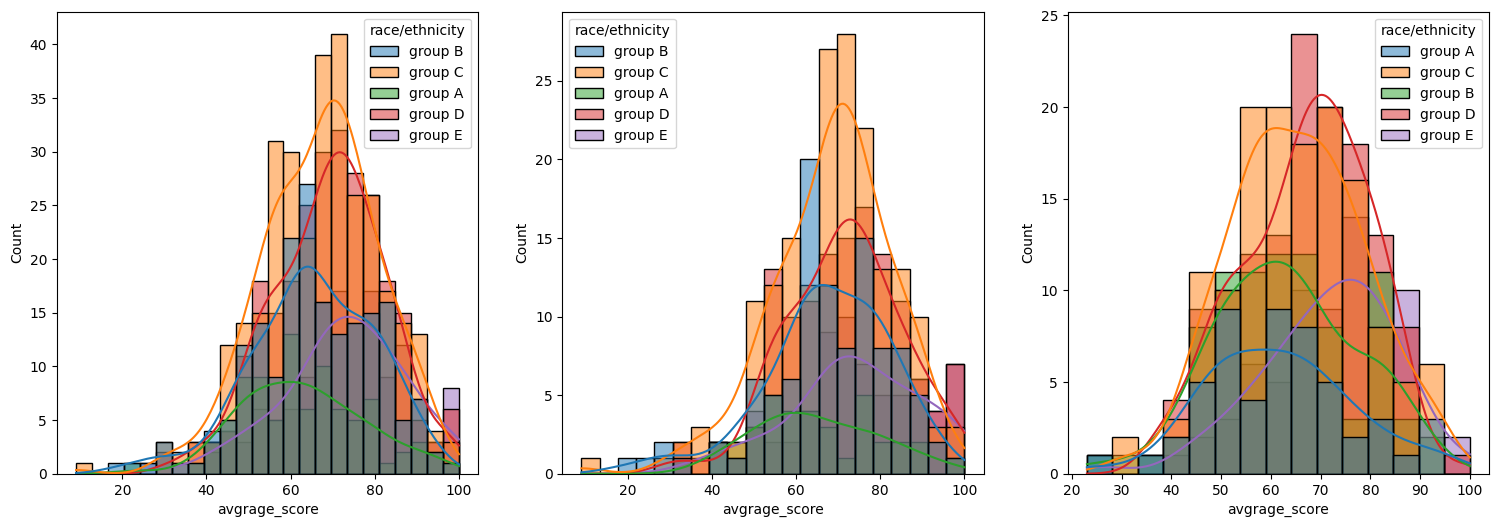

In [27]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='avgrage_score',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='avgrage_score',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='avgrage_score',kde=True,hue='race/ethnicity')
plt.show()

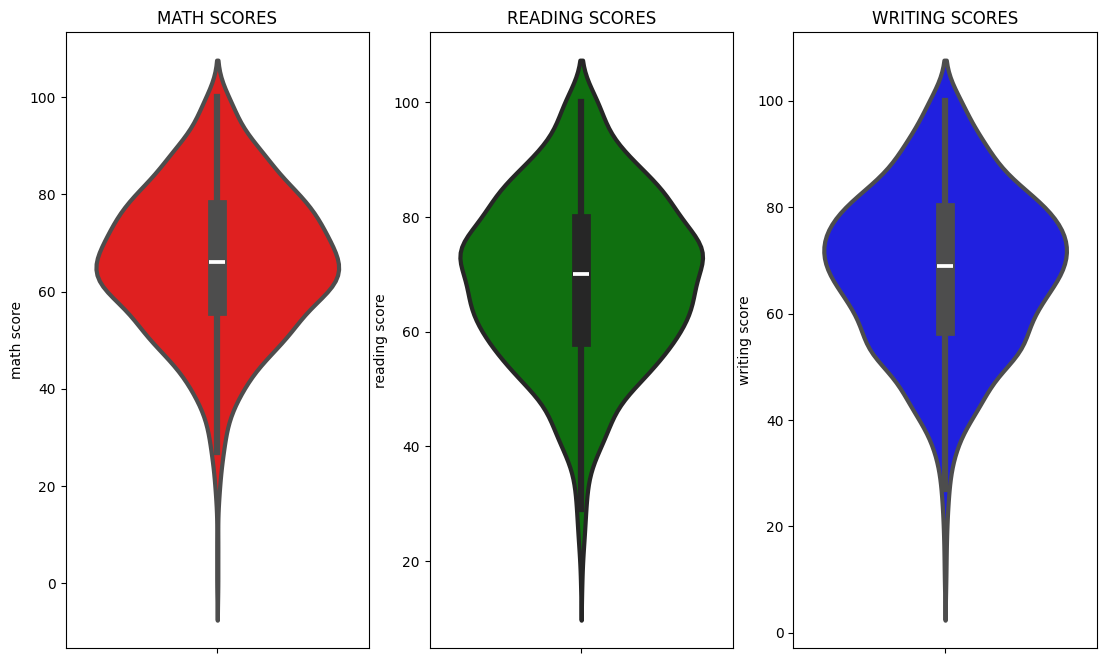

In [28]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

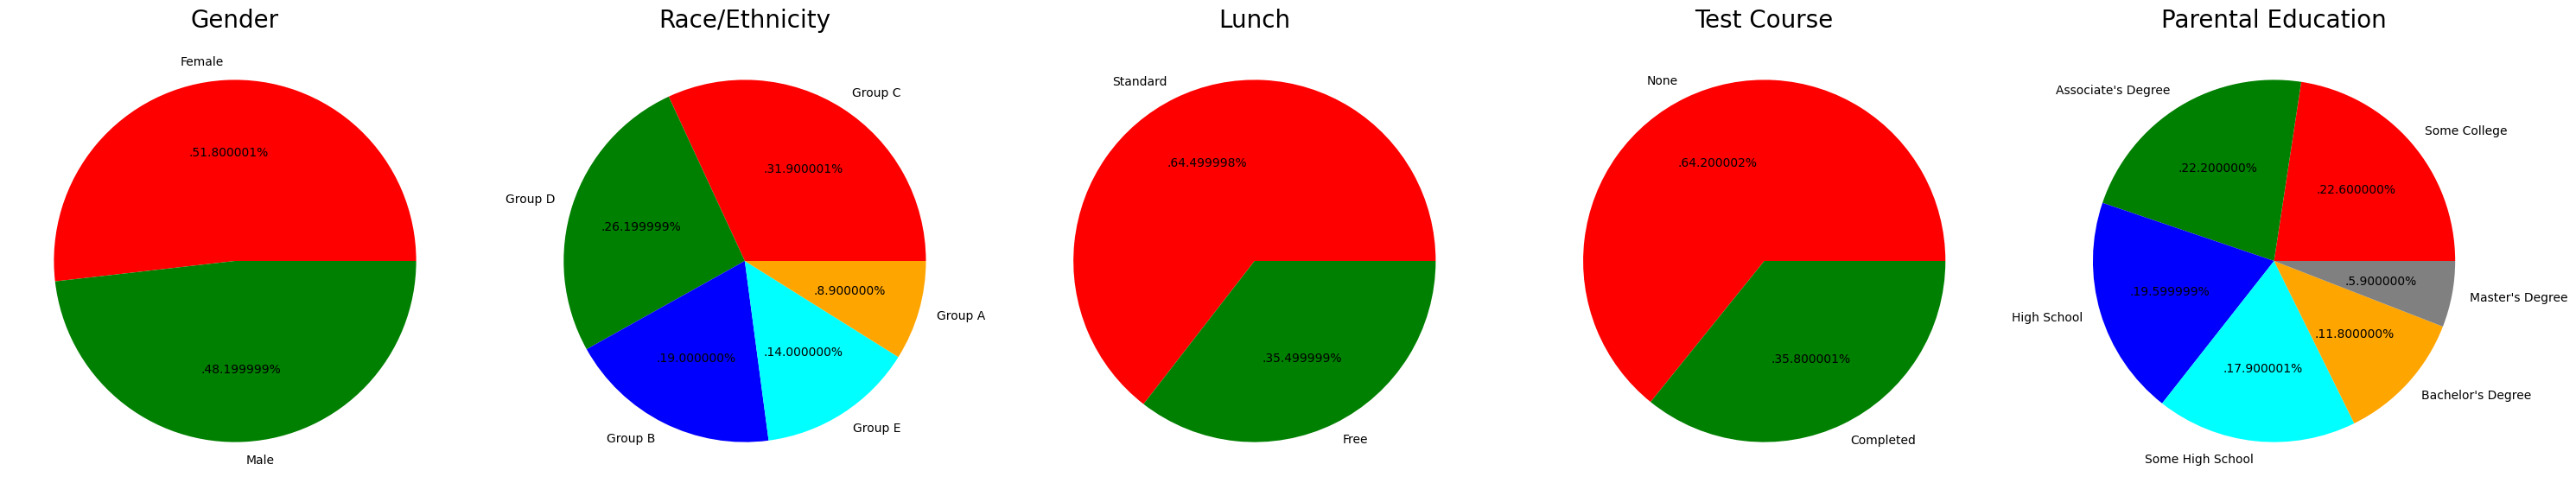

In [29]:

# Multivariate analysis using pieplot



plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()
plt.show()

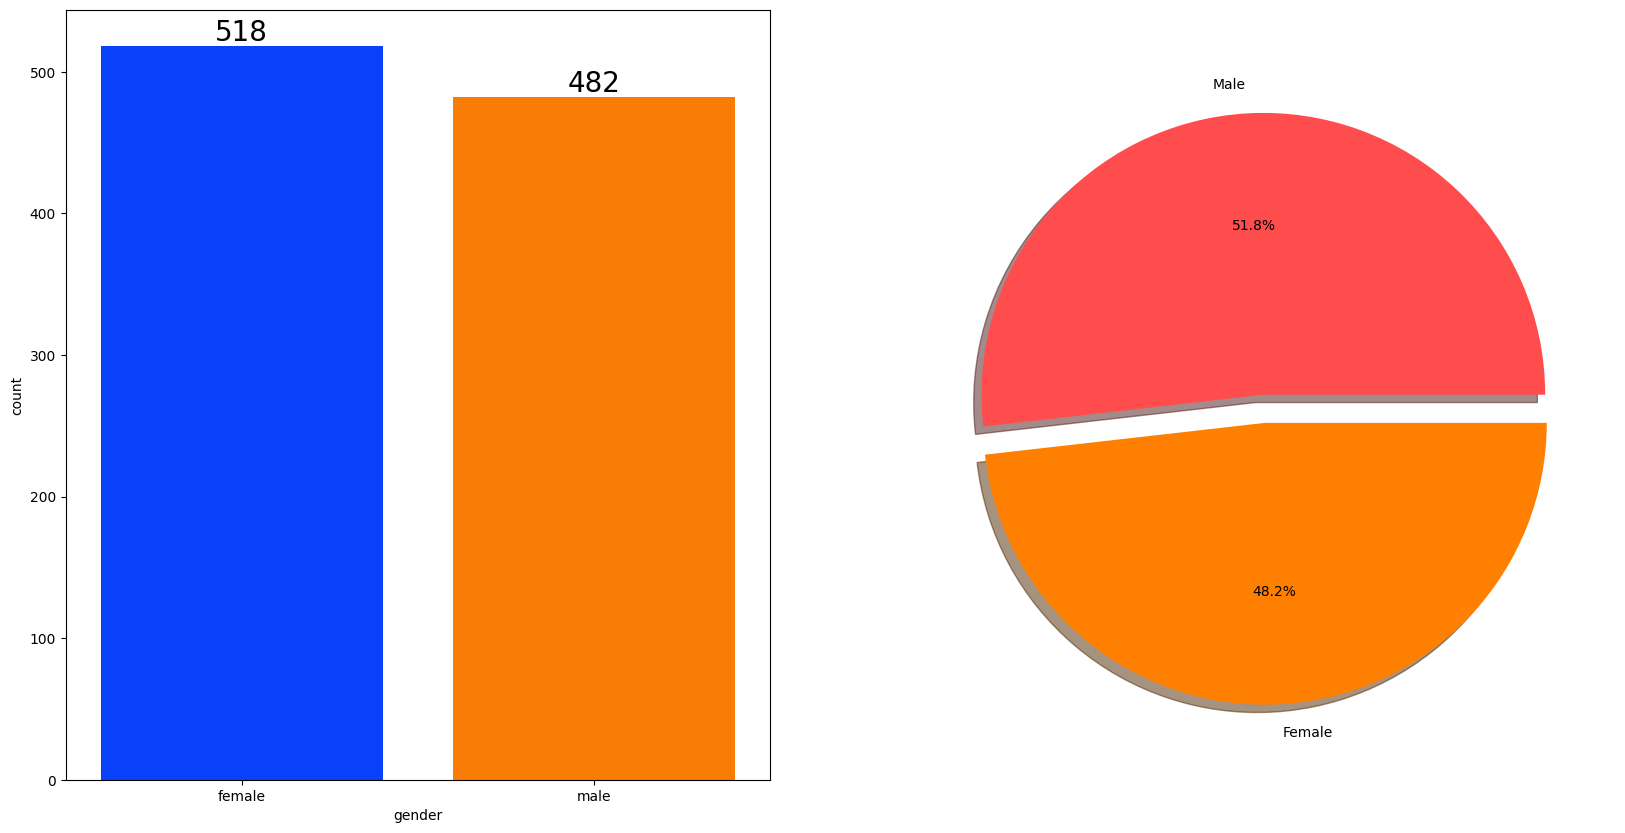

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

## OUTLIERS

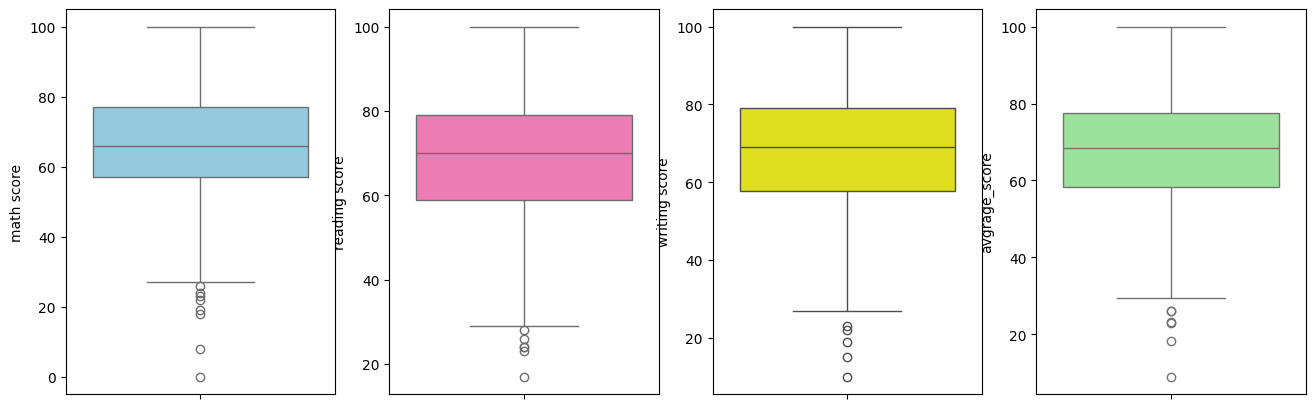

In [31]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['avgrage_score'],color='lightgreen')
plt.show()